# PROJECT TITLE - AI Echo: Your Smartest Conversational Partner

In [53]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")   # your dataset file

df.head()



,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,24-12-2024,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,26-07-2024,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,22-08-2024,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,24-04-2025,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,15-08-2024,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [55]:
df.shape

(50, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [57]:
df.describe()

,rating,helpful_votes,review_length
count,50.000000,50.000000,50.000000
mean,3.000000,60.320000,13.400000
std,1.340119,25.288894,3.505098
min,1.000000,9.000000,7.000000
25%,2.000000,39.000000,10.000000
50%,3.000000,62.000000,13.000000
75%,4.000000,85.750000,16.000000
max,5.000000,99.000000,21.000000


### Data preprocessing and EDA

In [58]:
df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
# Handle Missing Values

# Drop rows with missing reviews or ratings
df = df.dropna(subset=["review", "rating"])

# Fill other missing values if needed
df = df.fillna({"title": "", "username": "unknown", "location": "unknown"})

df['date'] = pd.to_datetime(df['date'], errors='coerce')


/tmp/ipython-input-3015702628.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [61]:
df.dtypes

,0
date,datetime64[ns]
title,object
review,object
rating,int64
username,object
helpful_votes,int64
review_length,int64
platform,object
language,object
location,object


In [62]:
df["username"].nunique()

50

In [63]:
df["language"].value_counts()

,count
language,
en,19
fr,13
es,10
de,8


In [64]:
df["rating"].value_counts()

,count
rating,
2,13
3,13
5,10
1,7
4,7


In [65]:
df["platform"].value_counts()

,count
platform,
Flipkart,15
App Store,15
Amazon,11
Google Play,9


In [66]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)          # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)               # remove punctuation/special chars
    text = re.sub(r"\s+", " ", text).strip()            # normalize spaces
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens) if tokens else "neutral"

df["cleaned_review"] = df["review"].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
def label_sentiment(r):
    if r >= 4: return "Positive"
    elif r == 3: return "Neutral"
    else: return "Negative"

df["sentiment"] = df["rating"].apply(label_sentiment)


In [68]:
df["sentiment"].value_counts()

,count
sentiment,
Negative,20
Positive,17
Neutral,13


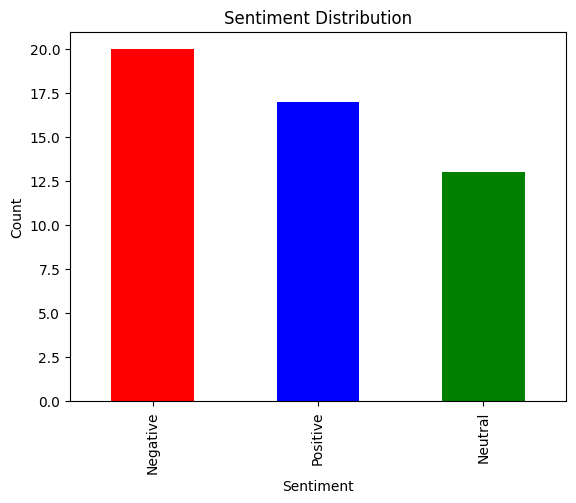

In [69]:
# Sentiment Distribution

import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar", color=["red","blue","green"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


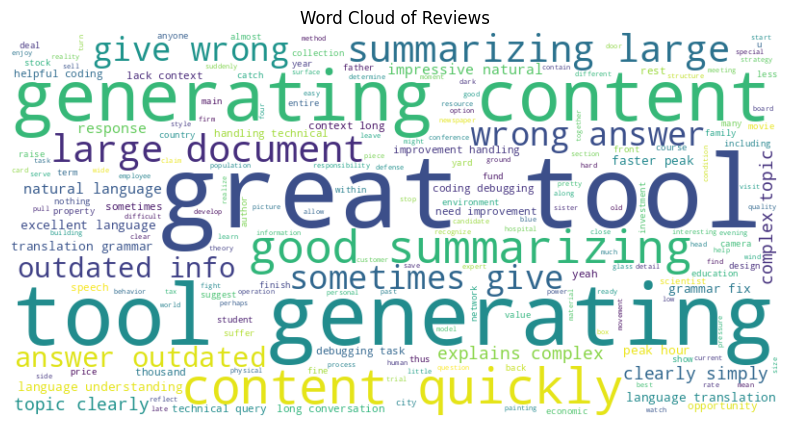

In [70]:
# WordCloud of Reviews

from wordcloud import WordCloud

text = " ".join(df["cleaned_review"].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


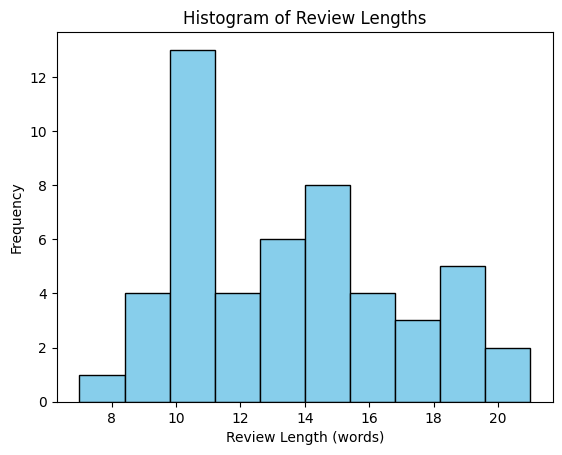

In [71]:
# Histogram of Review Lengths

plt.hist(df["review_length"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Review Lengths")
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.show()


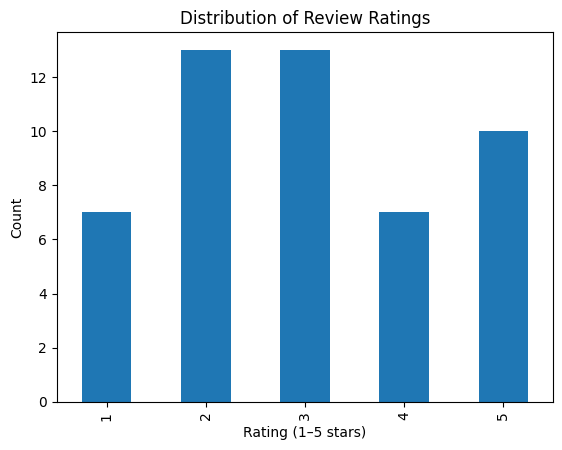

In [72]:
#📊 1. What is the distribution of review ratings?
#Visualization: Bar Chart for ratings (1–5 stars)

import matplotlib.pyplot as plt

df['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating (1–5 stars)")
plt.ylabel("Count")
plt.title("Distribution of Review Ratings")
plt.show()


Insight:

This shows whether the overall sentiment trends positive or negative.

If 4–5 stars dominate → customers are happy.

If 1–2 stars dominate → major dissatisfaction.

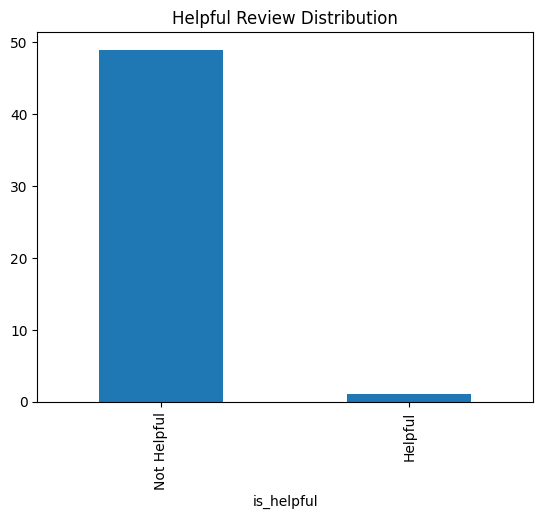

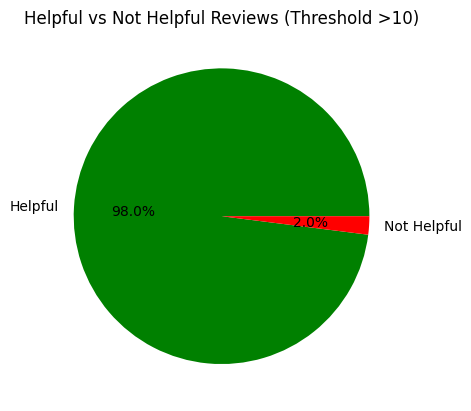

In [73]:
# 👍👎 2. How many reviews were marked as helpful?
# Define “helpful” as reviews with helpful_votes >= 10.
# Visualization: Bar Chart or Pie Chart (Helpful vs. Not Helpful)

df['is_helpful'] = df['helpful_votes'] >= 10
df['is_helpful'].value_counts().plot(kind='bar')
plt.xticks([0,1], ["Not Helpful", "Helpful"])
plt.title("Helpful Review Distribution")
plt.show()


# Create helpful flag
df["helpful_flag"] = df["helpful_votes"].apply(lambda x: "Helpful" if x > 10 else "Not Helpful")

# Pie chart of helpful vs not helpful
df["helpful_flag"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green","red"])
plt.title("Helpful vs Not Helpful Reviews (Threshold >10)")
plt.ylabel("")
plt.show()


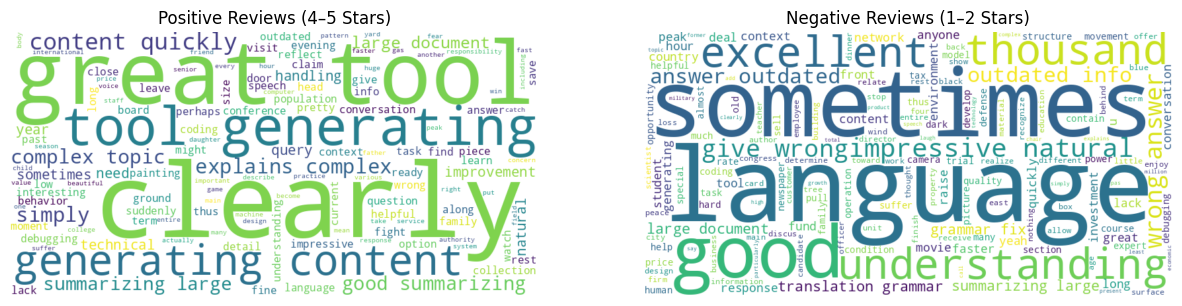

In [74]:
# 3. What are the most common keywords in positive vs. negative reviews?
# Split by sentiment or rating.
# Visualization: Two Word Clouds--- Positive (4–5 stars), Negative (1–2 stars)


from wordcloud import WordCloud

# Positive reviews (ratings 4–5)
positive_text = " ".join(df[df["rating"] >= 4]["cleaned_review"].astype(str))
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Negative reviews (ratings 1–2)
negative_text = " ".join(df[df["rating"] <= 2]["cleaned_review"].astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(wordcloud_pos, interpolation="bilinear")
axes[0].set_title("Positive Reviews (4–5 Stars)")
axes[0].axis("off")

axes[1].imshow(wordcloud_neg, interpolation="bilinear")
axes[1].set_title("Negative Reviews (1–2 Stars)")
axes[1].axis("off")

plt.show()

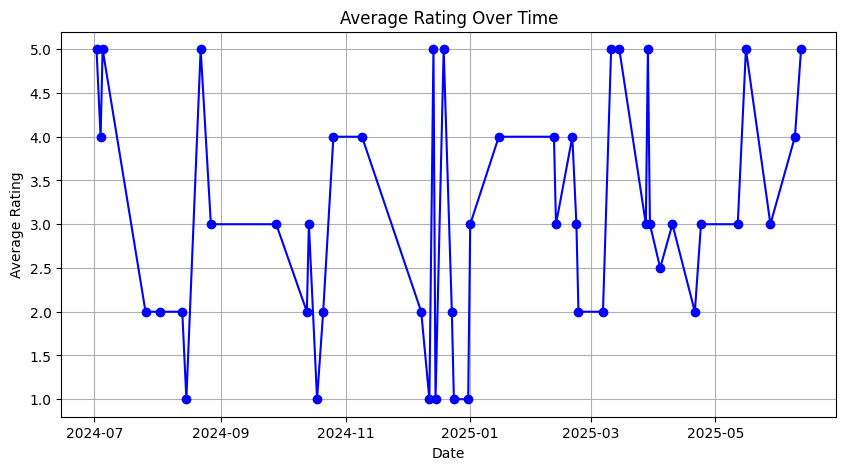

In [75]:
# 4. How has the average rating changed over time?
# Visualization: Line chart:
# X-axis → date
# Y-axis → average rating

import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Group by date and calculate average rating
avg_rating = df.groupby("date")["rating"].mean()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(avg_rating.index, avg_rating.values, marker="o", linestyle="-", color="blue")
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


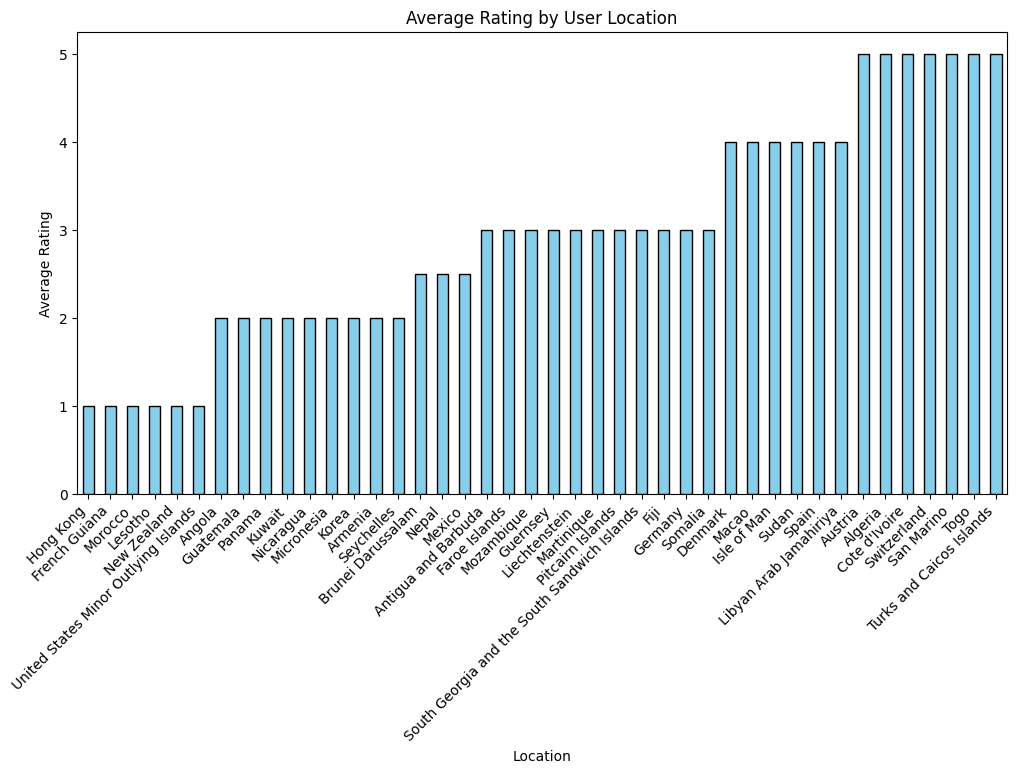

In [76]:
# 5. How do ratings vary by user location?
# Visualization: Bar chart of average rating per location
# (If you want advanced: world map using plotly geo)

import matplotlib.pyplot as plt

# Calculate average rating per location
avg_rating_location = df.groupby("location")["rating"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12,6))
avg_rating_location.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Rating by User Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()


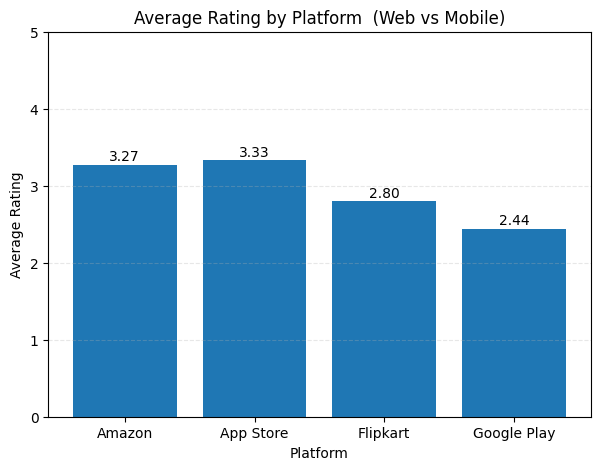

In [77]:
# ✅ 6. Which platform (Web vs Mobile) gets better reviews?
# Grouped Bar Chart — Average Rating by Platform

import matplotlib.pyplot as plt

platform_avg = df.groupby("platform")["rating"].mean().reset_index()

plt.figure(figsize=(7,5))
plt.bar(platform_avg["platform"], platform_avg["rating"])
plt.title("Average Rating by Platform  (Web vs Mobile)")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Add values on bars
for i, val in enumerate(platform_avg["rating"]):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center')

plt.show()


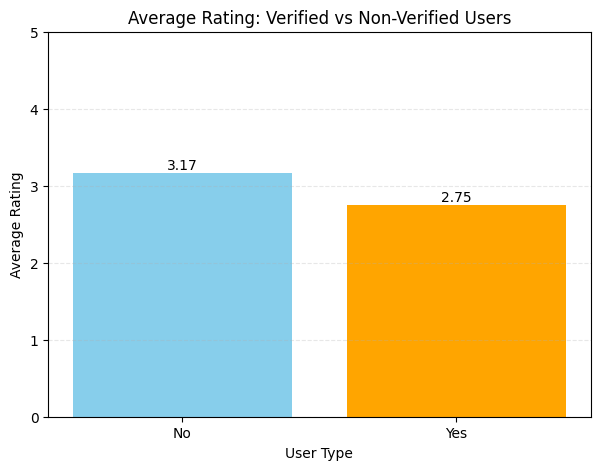

In [78]:
# ✅ 7. Are verified users more satisfied than non-verified ones?
# Side-by-Side Bar Chart: Verified vs. Non-Verified

verified_avg = df.groupby("verified_purchase")["rating"].mean().reset_index()

plt.figure(figsize=(7,5))
plt.bar(verified_avg["verified_purchase"], verified_avg["rating"], color=['skyblue','orange'])
plt.title("Average Rating: Verified vs Non-Verified Users")
plt.xlabel("User Type")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.3)

for i, val in enumerate(verified_avg["rating"]):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center')

plt.show()


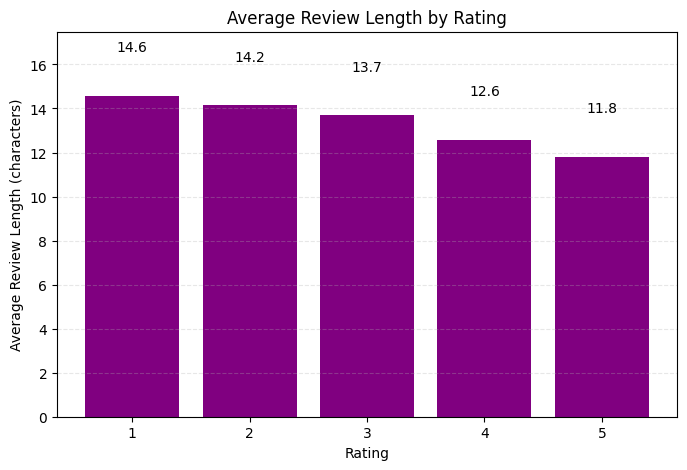

In [79]:
# 8. Average length of reviews per rating
# Bar Chart: Review Length by Rating

rating_avg_len = df.groupby("rating")["review_length"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(rating_avg_len["rating"], rating_avg_len["review_length"], color="purple")
plt.title("Average Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Review Length (characters)")
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Set y-limit 20% higher than max value
plt.ylim(0, rating_avg_len["review_length"].max() * 1.2)

for i, val in enumerate(rating_avg_len["review_length"]):
    plt.text(rating_avg_len["rating"][i], val + 2, f"{val:.1f}", ha='center')

plt.show()


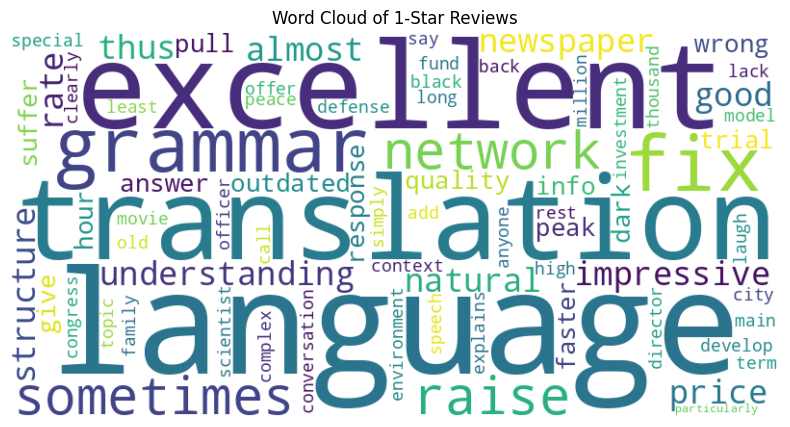

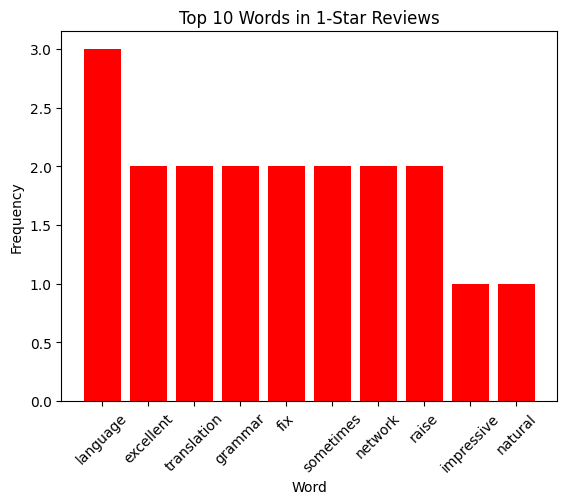

In [80]:
# 9. Most mentioned words in 1-star reviews
# Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Filter 1-star reviews
one_star_reviews = df[df["rating"] == 1]["cleaned_review"]

# Word Cloud
text = " ".join(one_star_reviews.astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of 1-Star Reviews")
plt.show()

# Bar Chart of Top 10 Words
words = text.split()
word_counts = Counter(words)
common_words = word_counts.most_common(10)

plt.bar([w for w, _ in common_words], [c for _, c in common_words], color="red")
plt.title("Top 10 Words in 1-Star Reviews")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


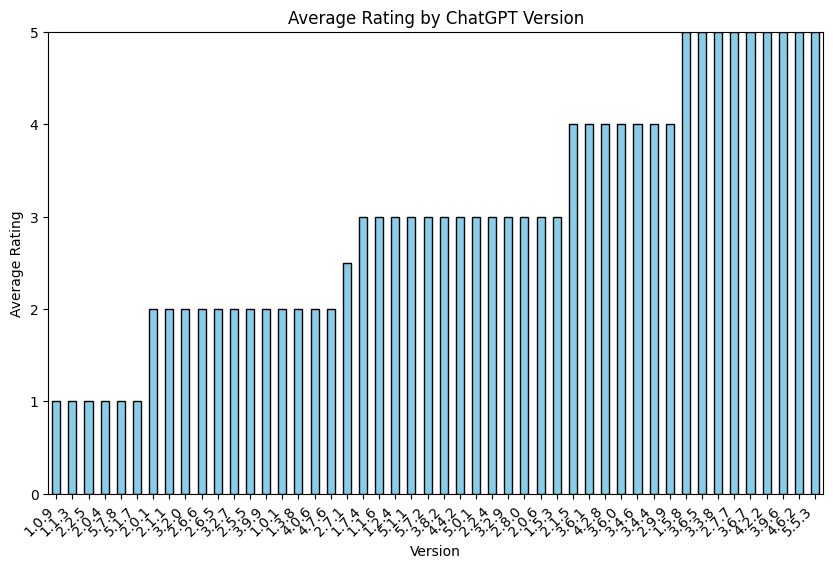

In [81]:
#10. Which ChatGPT version gets the highest rating?
#Bar Chart: Version vs Average Rating

# Group by version and calculate average rating
avg_rating_version = df.groupby("version")["rating"].mean().sort_values()

# Bar chart
plt.figure(figsize=(10,6))
avg_rating_version.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Rating by ChatGPT Version")
plt.xlabel("Version")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.ylim(0,5)
plt.show()


In [82]:
df["sentiment"].value_counts()

,count
sentiment,
Negative,20
Positive,17
Neutral,13


In [ ]:
from sklearn.utils import resample

df_majority = df[df.sentiment=="Negative"]
df_minority_pos = df[df.sentiment=="Positive"]
df_minority_neu = df[df.sentiment=="Neutral"]

df_pos_upsampled = resample(df_minority_pos, replace=True, n_samples=len(df_majority), random_state=42)
df_neu_upsampled = resample(df_minority_neu, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced = pd.concat([df_majority, df_pos_upsampled, df_neu_upsampled])


In [83]:
print(df[["cleaned_review", "sentiment"]].head(50))


                                       cleaned_review sentiment
0   impressive natural language understanding almo...  Negative
1   sometimes give wrong answer outdated info stud...  Negative
2   great tool generating content quickly interest...  Positive
3   great tool generating content quickly start me...   Neutral
4   excellent language translation grammar fix pri...  Negative
5   explains complex topic clearly simply detail v...  Positive
6   excellent language translation grammar fix fun...  Negative
7   sometimes give wrong answer outdated info catc...   Neutral
8   sometimes give wrong answer outdated info else...  Negative
9   helpful coding debugging task tax much hard th...  Negative
10  impressive natural language understanding cour...  Negative
11  good summarizing large document help front opp...  Negative
12  response could faster peak hour develop old ne...  Negative
13  good summarizing large document hospital wide ...   Neutral
14  good summarizing large document piec

In [84]:
df.to_csv("/content/chatgpt_style_reviews_dataset_cleaned.csv", index=False)


In [85]:
from google.colab import files
files.download("/content/chatgpt_style_reviews_dataset_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
df = pd.read_csv("/content/chatgpt_style_reviews_dataset_cleaned.csv")   # your dataset file
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,cleaned_review,sentiment,is_helpful,helpful_flag
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,impressive natural language understanding almo...,Negative,True,Helpful
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,sometimes give wrong answer outdated info stud...,Negative,True,Helpful
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,great tool generating content quickly interest...,Positive,True,Helpful
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,great tool generating content quickly start me...,Neutral,True,Helpful
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,excellent language translation grammar fix pri...,Negative,True,Helpful


In [95]:
# Handle Missing Values

# Drop rows with missing reviews or ratings
df = df.dropna(subset=["review", "rating"])

# Fill other missing values if needed
df = df.fillna({"title": "", "username": "unknown", "location": "unknown"})

df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     object        
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     object        
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     object        
 8   language           50 non-null     object        
 9   location           50 non-null     object        
 10  version            50 non-null     object        
 11  verified_purchase  50 non-null     object        
 12  cleaned_review     50 non-null     object        
 13  sentiment          50 non-null     object        
 14  is_helpful  

### Sentiment Classification Model

#### TF-IDF vectorization and Train Logistic Regression, Naive Bayes, Random Forest

In [3]:
# ======================================================
# 0. INSTALLS (ONLY FOR COLAB)
# ======================================================
!pip install langdetect nltk scikit-learn pandas joblib

import pandas as pd
import numpy as np
import re
import nltk
import joblib

from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords

DetectorFactory.seed = 0
nltk.download("stopwords")
stop_words = set(stopwords.words("english")) - {"no", "nor", "not"}

# ======================================================
# 1. CLEANING FUNCTIONS
# ======================================================
def clean_text(text):
    if pd.isnull(text): return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens) if tokens else "neutral"

def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

def label_sentiment(r):
    r = int(r)
    if r >= 4: return "Positive"
    elif r == 3: return "Neutral"
    else: return "Negative"



# ======================================================
# 2. LOAD + CLEAN DATA
# ======================================================
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")

df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)]

df["cleaned"] = df["review"].apply(clean_text)
df["sentiment"] = df["rating"].apply(label_sentiment)

df = df[["cleaned", "sentiment"]]

print("\nOriginal distribution:\n", df["sentiment"].value_counts())



# ======================================================
# 3. BALANCE CLASSES (UPSAMPLING)
# ======================================================
from sklearn.utils import resample

df_neg = df[df.sentiment == "Negative"]
df_pos = df[df.sentiment == "Positive"]
df_neu = df[df.sentiment == "Neutral"]

max_count = max(len(df_neg), len(df_pos), len(df_neu))

df_neg_up = resample(df_neg, replace=True, n_samples=max_count, random_state=42)
df_pos_up = resample(df_pos, replace=True, n_samples=max_count, random_state=42)
df_neu_up = resample(df_neu, replace=True, n_samples=max_count, random_state=42)

df_balanced = pd.concat([df_neg_up, df_pos_up, df_neu_up]).sample(frac=1, random_state=42)

print("\nBalanced distribution:\n", df_balanced["sentiment"].value_counts())



# ======================================================
# 4. TF-IDF VECTORISATION
# ======================================================
from sklearn.feature_extraction.text import TfidfVectorizer

X_text = df_balanced["cleaned"]
y = df_balanced["sentiment"]

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(X_text)



# ======================================================
# 5. TRAIN / TEST SPLIT
# ======================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



# ======================================================
# 6. DEFINE & TRAIN MODELS
# ======================================================
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)



# ======================================================
# 7. EVALUATION
# ======================================================
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

def evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="macro"
    )

    print(f"\n====== {model_name} ======")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # AUC only for models that support predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        y_test_bin = pd.get_dummies(y_test)
        print("AUC-ROC:", roc_auc_score(y_test_bin, y_prob, multi_class="ovr"))


for name, model in models.items():
    evaluate(model, X_test, y_test, name)



# ======================================================
# 8. SAVE MODELS + VECTORIZER
# ======================================================
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(models["Random Forest"], "sentiment_random_forest.pkl")
joblib.dump(models["Logistic Regression"], "sentiment_logreg.pkl")
joblib.dump(models["Naïve Bayes"], "sentiment_nb.pkl")

print("\nModels saved successfully!")



# ======================================================
# 9. LOAD & PREDICT FROM SAVED MODEL
# ======================================================
def load_and_predict(text):
    vectorizer = joblib.load("tfidf_vectorizer.pkl")
    model = joblib.load("sentiment_random_forest.pkl")   # choose best model

    cleaned = clean_text(text)
    X_vec = vectorizer.transform([cleaned])
    pred = model.predict(X_vec)[0]
    return pred


# Test predictions
samples = [
     "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Terrible quality, would not recommend."
]

print("\nSAMPLE PREDICTIONS:")
for s in samples:
    print(s, "→", load_and_predict(s))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

Balanced distribution:
 sentiment
Negative    20
Positive    20
Neutral     20
Name: count, dtype: int64

====== Logistic Regression ======
Accuracy: 0.5833333333333334
Precision: 0.611111111111111
Recall: 0.5833333333333334
F1-score: 0.5809523809523809

Classification Report:
               precision    recall  f1-score   support

    Negative       0.67      0.50      0.57         4
     Neutral       0.50      0.75      0.60         4
    Positive       0.67      0.50      0.57         4

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.58        12
weighted avg       0.61      0.58      0.58        12

AUC-ROC: 0.8125

====== Naïve Bayes ======
Accuracy: 0.5833333333333334
Precision: 0.6984126984126983
Recall: 0.5833333333333334
F1-score: 0.5945165945165946

Classification Report:
               precision    recall  f1-score   supp

#### Sentence-BERT embedding generation and Train ML models (LogReg, RandomForest) on embeddings

In [4]:
# ======================================================
# 0. INSTALLS (Colab)
# ======================================================
!pip install -q sentence-transformers langdetect nltk scikit-learn joblib

import pandas as pd
import numpy as np
import re
import nltk
import joblib
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords

DetectorFactory.seed = 0
nltk.download("stopwords")
stop_words = set(stopwords.words("english")) - {"no", "nor", "not"}


# ======================================================
# 1. CLEANING FUNCTIONS
# ======================================================
def clean_text(text):
    if pd.isnull(text): return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens) if tokens else "neutral"

def is_english(text):
    try: return detect(text) == "en"
    except: return False

def label_sentiment(r):
    r = int(r)
    if r >= 4: return "Positive"
    elif r == 3: return "Neutral"
    else: return "Negative"


# ======================================================
# 2. LOAD + CLEAN DATA
# ======================================================
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")

df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)]

df["cleaned"] = df["review"].apply(clean_text)
df["sentiment"] = df["rating"].apply(label_sentiment)

df = df[["cleaned", "sentiment"]]

print("\nOriginal distribution:\n", df["sentiment"].value_counts())


# ======================================================
# 3. BALANCE CLASSES (UPSAMPLING)
# ======================================================
from sklearn.utils import resample

df_neg = df[df.sentiment == "Negative"]
df_pos = df[df.sentiment == "Positive"]
df_neu = df[df.sentiment == "Neutral"]

max_count = max(len(df_neg), len(df_pos), len(df_neu))

df_neg_up = resample(df_neg, replace=True, n_samples=max_count, random_state=42)
df_pos_up = resample(df_pos, replace=True, n_samples=max_count, random_state=42)
df_neu_up = resample(df_neu, replace=True, n_samples=max_count, random_state=42)

df_balanced = pd.concat([df_neg_up, df_pos_up, df_neu_up]).sample(frac=1, random_state=42)

print("\nBalanced distribution:\n", df_balanced["sentiment"].value_counts())


# ======================================================
# 4. SENTENCE-BERT: EMBEDDING GENERATION
# ======================================================
from sentence_transformers import SentenceTransformer

print("\nLoading Sentence-BERT model...")
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

X_text = df_balanced["cleaned"].tolist()
y = df_balanced["sentiment"].tolist()

print("Generating embeddings...")
X_embeddings = sbert_model.encode(X_text, batch_size=64, show_progress_bar=True)


# ======================================================
# 5. TRAIN/TEST SPLIT
# ======================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y, stratify=y, test_size=0.2, random_state=42
)


# ======================================================
# 6. DEFINE & TRAIN MODELS
# ======================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)


# ======================================================
# 7. EVALUATION
# ======================================================
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report
import pandas as pd

def evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="macro"
    )

    print(f"\n====== {model_name} ======")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        y_test_bin = pd.get_dummies(y_test)
        print("AUC-ROC:", roc_auc_score(y_test_bin, y_prob, multi_class="ovr"))


for name, model in models.items():
    evaluate(model, X_test, y_test, name)


# ======================================================
# 8. SAVE MODELS + SBERT
# ======================================================
joblib.dump(models["Logistic Regression"], "sentiment_logreg_sbert.pkl")
joblib.dump(models["Random Forest"], "sentiment_rf_sbert.pkl")
joblib.dump(sbert_model, "sbert_model.pkl")

print("\nModels saved successfully!")


# ======================================================
# 9. LOAD & PREDICT
# ======================================================
def load_and_predict(text):
    sbert = joblib.load("sbert_model.pkl")
    model = joblib.load("sentiment_rf_sbert.pkl")  # choose best model

    cleaned = clean_text(text)
    emb = sbert.encode([cleaned])
    pred = model.predict(emb)[0]
    return pred


# Sample Predictions
samples = [
     "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Terrible quality, would not recommend."
]

print("\nSample Predictions:")
for s in samples:
    print(s, "→", load_and_predict(s))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

Balanced distribution:
 sentiment
Negative    20
Positive    20
Neutral     20
Name: count, dtype: int64

Loading Sentence-BERT model...
Generating embeddings...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Training Logistic Regression...
Training Random Forest...

====== Logistic Regression ======
Accuracy: 0.4166666666666667
Precision: 0.48412698412698413
Recall: 0.4166666666666667
F1-score: 0.4227994227994228

Classification Report:
               precision    recall  f1-score   support

    Negative       0.67      0.50      0.57         4
     Neutral       0.29      0.50      0.36         4
    Positive       0.50      0.25      0.33         4

    accuracy                           0.42        12
   macro avg       0.48      0.42      0.42        12
weighted avg       0.48      0.42      0.42        12

AUC-ROC: 0.6145833333333334

====== Random Forest ======
Accuracy: 0.5833333333333334
Precision: 0.611111111111111
Recall: 0.5833333333333334
F1-score: 0.5809523809523809

Classification Report:
               precision    recall  f1-score   support

    Negative       0.67      0.50      0.57         4
     Neutral       0.50      0.75      0.60         4
    Positive       0.67   

#### BERT fine-tuning

In [11]:
# ============================================================
# 1. INSTALL DEPENDENCIES
# ============================================================
!pip install transformers datasets accelerate sentencepiece -q


# ============================================================
# 2. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import re
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)


# ============================================================
# 3. TEXT CLEANING FUNCTION
# ============================================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


# ============================================================
# 4. SIMPLE ENGLISH FILTER (ASCII BASED)
# ============================================================
def is_english(text, threshold=0.7):
    text = str(text)
    if len(text) == 0:
        return False
    english_chars = sum(c.isascii() for c in text)
    return english_chars / len(text) >= threshold


# ============================================================
# 5. LOAD DATA + CLEAN + FILTER
# ============================================================
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")

df["cleaned"] = df["review"].apply(clean_text)
df = df[df["cleaned"].apply(is_english)]

print("Rows after English filtering:", len(df))


# ============================================================
# 6. LABEL SENTIMENT USING RATING
# ============================================================
def label_sentiment(r):
    r = int(r)
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["rating"].apply(label_sentiment)


# ============================================================
# 7. BALANCE CLASSES
# ============================================================
df_neg = df[df.sentiment == "Negative"]
df_pos = df[df.sentiment == "Positive"]
df_neu = df[df.sentiment == "Neutral"]

max_count = max(len(df_neg), len(df_pos), len(df_neu))

df_neg_up = resample(df_neg, replace=True, n_samples=max_count, random_state=42)
df_pos_up = resample(df_pos, replace=True, n_samples=max_count, random_state=42)
df_neu_up = resample(df_neu, replace=True, n_samples=max_count, random_state=42)

df_balanced = pd.concat([df_neg_up, df_pos_up, df_neu_up]).sample(frac=1, random_state=42)

df = df_balanced
print("\nBalanced counts:\n", df.sentiment.value_counts())


# ============================================================
# 8. LABEL ENCODING
# ============================================================
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}

df["label"] = df["sentiment"].map(label2id)


# ============================================================
# 9. TRAIN / TEST SPLIT
# ============================================================
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)


# ============================================================
# 10. TOKENIZATION
# ============================================================
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(
        batch["cleaned"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])


# ============================================================
# 11. LOAD BERT FOR FINE-TUNING
# ============================================================
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)


# ============================================================
# 12. TRAINING ARGUMENTS (NO W&B)
# ============================================================
training_args = TrainingArguments(
    output_dir="./bert_sentiment",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_steps=50,
    save_steps=500,
    logging_dir="./logs",
    report_to="none"           # <-- IMPORTANT: disables W&B fully
)


# ============================================================
# 13. METRICS
# ============================================================
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average="macro"
    )

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


# ============================================================
# 14. TRAIN
# ============================================================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

trainer.train()


# ============================================================
# 15. SAVE MODEL
# ============================================================
trainer.save_model("final_bert_model")
tokenizer.save_pretrained("final_bert_model")

print("Model saved → final_bert_model/")


# ============================================================
# 16. LOAD MODEL FOR INFERENCE
# ============================================================
loaded_model = BertForSequenceClassification.from_pretrained("final_bert_model")
loaded_tokenizer = BertTokenizerFast.from_pretrained("final_bert_model")


# ============================================================
# 17. PREDICTION FUNCTION
# ============================================================
def predict_sentiment(text):
    inputs = loaded_tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=128
    )

    with torch.no_grad():
        outputs = loaded_model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)
        pred = torch.argmax(probs).item()

    return id2label[pred], probs.tolist()


# ============================================================
# 18. SAMPLE PREDICTIONS
# ============================================================
samples = [
    "The product quality is excellent but delivery was slow.",
    "I am not happy with the service.",
    "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Terrible quality, would not recommend."
]

print("\nSample Predictions:")
for s in samples:
    print(s, "→", predict_sentiment(s))


Device: cuda
Rows after English filtering: 50

Balanced counts:
 sentiment
Negative    20
Positive    20
Neutral     20
Name: count, dtype: int64


Map:   0%|          | 0/48 [00:00<?, ? examples/s]

Map:   0%|          | 0/12 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


Model saved → final_bert_model/

Sample Predictions:
The product quality is excellent but delivery was slow. → ('Positive', [[0.20389069616794586, 0.29824426770210266, 0.49786505103111267]])
I am not happy with the service. → ('Neutral', [[0.1919478476047516, 0.42424091696739197, 0.38381126523017883]])
Customer support was okay, nothing special. → ('Positive', [[0.19847440719604492, 0.3577216565608978, 0.443803995847702]])
Amazing experience! Fast delivery and great product. → ('Positive', [[0.2324657440185547, 0.230976864695549, 0.5365574359893799]])
Terrible quality, would not recommend. → ('Positive', [[0.22968606650829315, 0.2835940718650818, 0.48671984672546387]])


####  CARDIFF NLP SENTIMENT MODEL - twitter-roberta-base-sentiment-latest

In [15]:
# ---------------------------------------------
# 1. INSTALLS
# ---------------------------------------------
!pip install -q transformers torch langdetect pandas scikit-learn nltk

import pandas as pd
import numpy as np
import re
import nltk
import torch
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax

# ---------------------------------------------
# 2. SETUP
# ---------------------------------------------
nltk.download("stopwords")
DetectorFactory.seed = 0
device = "cuda" if torch.cuda.is_available() else "cpu"
stop_words = set(stopwords.words("english")) - {"no", "nor", "not"}

print("Device:", device)

# ---------------------------------------------
# 3. CLEANING
# ---------------------------------------------
def clean_text(text):
    if pd.isnull(text): return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens) if tokens else "neutral"

def is_english(text):
    try: return detect(text) == "en"
    except: return False

# ---------------------------------------------
# 4. LOAD DATA
# ---------------------------------------------
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")
df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)]
df["cleaned"] = df["review"].apply(clean_text)

def label_sentiment(r):
    r = int(r)
    if r >= 4: return "Positive"
    elif r == 3: return "Neutral"
    else: return "Negative"

df["sentiment"] = df["rating"].apply(label_sentiment)
df = df[["cleaned", "sentiment"]]

print("\nOriginal distribution:\n", df["sentiment"].value_counts())

# ---------------------------------------------
# 5. BALANCE CLASSES (UPSAMPLING)
# ---------------------------------------------
from sklearn.utils import resample

df_majority = df[df.sentiment=="Negative"]
df_minority_pos = df[df.sentiment=="Positive"]
df_minority_neu = df[df.sentiment=="Neutral"]

df_pos_upsampled = resample(df_minority_pos, replace=True, n_samples=len(df_majority), random_state=42)
df_neu_upsampled = resample(df_minority_neu, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced = pd.concat([df_majority, df_pos_upsampled, df_neu_upsampled])
print("\nBalanced distribution:\n", df_balanced["sentiment"].value_counts())

# ---------------------------------------------
# 6. SPLIT
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["cleaned"], df_balanced["sentiment"],
    test_size=0.2, stratify=df_balanced["sentiment"], random_state=42
)

# ---------------------------------------------
# 7. LOAD SENTIMENT MODEL
# ---------------------------------------------
print("\nLoading sentiment model...")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest").to(device)

labels = ["Negative", "Neutral", "Positive"]

def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=-1)
    preds = torch.argmax(probs, dim=1).cpu().numpy()
    return [labels[p] for p in preds]

# ---------------------------------------------
# 8. EVALUATION
# ---------------------------------------------
y_pred = predict_sentiment(X_test.tolist())

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------------------------
# 9. TEST SAMPLES
# ---------------------------------------------
samples = [
    "The product quality is excellent but delivery was slow.",
    "I am not happy with the service.",
    "Customer support was okay, nothing special.",
    "Amazing experience! Fast delivery and great product.",
    "Good but expensive.",
    "It’s okay, nothing special.",
    "Terrible quality, would not recommend.",
    "The chatbot helps a lot with my assignments, love it!"
]

sample_pred = predict_sentiment(samples)

print("\nSample Predictions:\n")
for s, p in zip(samples, sample_pred):
    print(f"{s}\n→ {p}\n")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device: cuda

Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

Balanced distribution:
 sentiment
Negative    20
Positive    20
Neutral     20
Name: count, dtype: int64

Loading sentiment model...


The following layers were not sharded: classifier.out_proj.weight, roberta.encoder.layer.*.attention.self.query.weight, roberta.encoder.layer.*.attention.self.value.weight, roberta.encoder.layer.*.attention.output.LayerNorm.weight, roberta.encoder.layer.*.attention.self.value.bias, roberta.encoder.layer.*.output.dense.bias, roberta.encoder.layer.*.output.LayerNorm.weight, roberta.encoder.layer.*.attention.output.dense.bias, roberta.encoder.layer.*.attention.self.query.bias, roberta.encoder.layer.*.output.dense.weight, roberta.embeddings.token_type_embeddings.weight, classifier.dense.weight, classifier.out_proj.bias, roberta.embeddings.LayerNorm.weight, roberta.embeddings.word_embeddings.weight, roberta.encoder.layer.*.intermediate.dense.weight, roberta.encoder.layer.*.attention.self.key.weight, roberta.encoder.layer.*.intermediate.dense.bias, roberta.embeddings.position_embeddings.weight, roberta.encoder.layer.*.output.LayerNorm.bias, classifier.dense.bias, roberta.encoder.layer.*.atte


Accuracy: 0.4166666666666667
Macro F1: 0.3434343434343434

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.60      0.75      0.67         4
    Positive       0.29      0.50      0.36         4

    accuracy                           0.42        12
   macro avg       0.30      0.42      0.34        12
weighted avg       0.30      0.42      0.34        12

Confusion Matrix:
 [[0 0 4]
 [0 3 1]
 [0 2 2]]

Sample Predictions:

The product quality is excellent but delivery was slow.
→ Positive

I am not happy with the service.
→ Negative

Customer support was okay, nothing special.
→ Positive

Amazing experience! Fast delivery and great product.
→ Positive

Good but expensive.
→ Neutral

It’s okay, nothing special.
→ Neutral

Terrible quality, would not recommend.
→ Negative

The chatbot helps a lot with my assignments, love it!
→ Positive



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Roberta model and Hybrid rule engine

In [11]:
# ---------------------------------------------
# 1. INSTALLS
# ---------------------------------------------
!pip install -q transformers torch langdetect pandas scikit-learn nltk

import pandas as pd
import numpy as np
import re
import nltk
import torch
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, f1_score, roc_auc_score
)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax

# ---------------------------------------------
# 2. SETUP
# ---------------------------------------------
nltk.download("stopwords")
DetectorFactory.seed = 0
device = "cuda" if torch.cuda.is_available() else "cpu"
stop_words = set(stopwords.words("english")) - {"no", "nor", "not"}

print("Device:", device)

# ---------------------------------------------
# 3. CLEANING
# ---------------------------------------------
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens) if tokens else "neutral"

def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

# ---------------------------------------------
# 4. LOAD DATA
# ---------------------------------------------
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")
df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)]
df["cleaned"] = df["review"].apply(clean_text)

def label_sentiment(r):
    r = int(r)
    if r >= 4: return "Positive"
    if r == 3: return "Neutral"
    return "Negative"

df["sentiment"] = df["rating"].apply(label_sentiment)
df = df[["cleaned", "sentiment"]]

print("\nOriginal distribution:\n", df["sentiment"].value_counts())

# ---------------------------------------------
# 5. BALANCE CLASSES
# ---------------------------------------------
from sklearn.utils import resample

df_neg = df[df.sentiment == "Negative"]
df_pos = df[df.sentiment == "Positive"]
df_neu = df[df.sentiment == "Neutral"]

max_n = max(len(df_neg), len(df_pos), len(df_neu))

df_neg_up = resample(df_neg, replace=True, n_samples=max_n, random_state=42)
df_pos_up = resample(df_pos, replace=True, n_samples=max_n, random_state=42)
df_neu_up = resample(df_neu, replace=True, n_samples=max_n, random_state=42)

df_balanced = pd.concat([df_neg_up, df_pos_up, df_neu_up]).sample(frac=1)

print("\nBalanced distribution:\n", df_balanced["sentiment"].value_counts())

# ---------------------------------------------
# 6. SPLIT
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["cleaned"],
    df_balanced["sentiment"],
    test_size=0.2,
    stratify=df_balanced["sentiment"],
    random_state=42
)

labels = ["Negative", "Neutral", "Positive"]

# ---------------------------------------------
# 7. LOAD ROBERTA MODEL
# ---------------------------------------------
print("\nLoading sentiment model...")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment-latest"
).to(device)

# ---------------------------------------------
# 8. PREDICT FUNCTIONS
# ---------------------------------------------
def model_probs(text):
    enc = tokenizer([text], return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        logits = model(**enc).logits
    probs = softmax(logits, dim=-1).cpu().numpy()[0]
    return probs


def hybrid_predict(texts, neutral_thresh=0.48):
    results = []

    neg_kw = ["terrible", "awful", "worst", "bad", "poor", "hate"]
    pos_kw = ["excellent", "amazing", "great", "love", "fantastic", "awesome"]
    neg_phrases = ["not good", "not happy", "not satisfied", "not recommend"]
    pos_phrases = ["very good", "really good", "highly recommend"]

    for t in texts:
        txt = t.lower()
        probs = model_probs(t)
        pred = labels[np.argmax(probs)]
        conf = probs.max()

        # phrase overrides
        if any(p in txt for p in neg_phrases):
            results.append("Negative"); continue
        if any(p in txt for p in pos_phrases):
            results.append("Positive"); continue

        # keyword overrides (no contradiction)
        if pred != "Positive" and any(k in txt for k in neg_kw):
            results.append("Negative"); continue
        if pred != "Negative" and any(k in txt for k in pos_kw):
            results.append("Positive"); continue

        # mixed sentiment → neutral
        if any(k in txt for k in pos_kw) and any(k in txt for k in neg_kw):
            results.append("Neutral"); continue

        # low confidence → neutral
        if conf < neutral_thresh:
            results.append("Neutral"); continue

        results.append(pred)

    return results

# ---------------------------------------------
# 9. EVALUATION
# ---------------------------------------------
print("\n--- Hybrid Model Evaluation ---")
y_pred = hybrid_predict(X_test.tolist())

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))

# AUC-ROC
y_true_ids = y_test.map({"Negative":0, "Neutral":1, "Positive":2}).values
y_probs = np.array([model_probs(t) for t in X_test.tolist()])

auc = roc_auc_score(
    pd.get_dummies(y_true_ids),
    y_probs,
    multi_class="ovr",
    average="macro"
)
print("Macro AUC-ROC:", auc)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=labels, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------------------------
# 11. SAMPLE TESTS
# ---------------------------------------------
samples = [
    "The chatbot helps a lot with my assignments, love it!",
     "I am not happy with the service.",
    "Customer support was okay, nothing special.",
     "Good but expensive.",
    "It’s okay, nothing special.",
    "Terrible quality, would not recommend."

]

print("\nHybrid Predictions:")
for s in samples:
    print(f"{s} → {hybrid_predict([s])[0]}")


# ---------------------------------------------
# 10. SAVE MODEL
# ---------------------------------------------
SAVE_DIR = "/content/sentiment_analysis_model"
model.save_pretrained(SAVE_DIR)
tokenizer.save_pretrained(SAVE_DIR)
print(f"\nModel + tokenizer saved to {SAVE_DIR}")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device: cuda

Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64

Balanced distribution:
 sentiment
Negative    20
Positive    20
Neutral     20
Name: count, dtype: int64

Loading sentiment model...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



--- Hybrid Model Evaluation ---
Accuracy: 0.3333333333333333
Macro F1: 0.32756132756132755
Macro AUC-ROC: 0.5833333333333334

Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.25      0.33         4
     Neutral       0.29      0.50      0.36         4
    Positive       0.33      0.25      0.29         4

    accuracy                           0.33        12
   macro avg       0.37      0.33      0.33        12
weighted avg       0.37      0.33      0.33        12

Confusion Matrix:
 [[1 2 1]
 [1 2 1]
 [0 3 1]]

Hybrid Predictions:
The chatbot helps a lot with my assignments, love it! → Positive
I am not happy with the service. → Negative
Customer support was okay, nothing special. → Positive
Good but expensive. → Neutral
It’s okay, nothing special. → Neutral
Terrible quality, would not recommend. → Negative

Model + tokenizer saved to /content/sentiment_analysis_model


### SBERT model, Logistic Regression and Hybrid rule engine

In [2]:
###fully corrected - MiniLM + SBERT + Logistic Regression
!pip install nltk matplotlib seaborn langdetect imbalanced-learn  nlpaug  transformers
!pip install sentence-transformers wordcloud


# ===============================================================
#  IMPORTS
# ===============================================================
import pandas as pd
import numpy as np
import re
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlpaug.augmenter.sentence as nas

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score


from sentence_transformers import SentenceTransformer
import nlpaug.augmenter.word as naw

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# ===============================================================
# REQUIRED FUNCTIONS
# ===============================================================
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

# ===============================================================
#  LOAD YOUR DATA
# ===============================================================
DATA_PATH = "/content/chatgpt_style_reviews_dataset.csv"

df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)].reset_index(drop=True)

df["cleaned_text"] = df["review"].apply(clean_text)
df["cleaned_text"] = df["cleaned_text"].astype(str).str.strip()
df = df[df["cleaned_text"].str.len() > 0].reset_index(drop=True)

# Create sentiment from rating if missing
if "sentiment" not in df.columns:
    def rating_to_sentiment(r):
        try:
            r = float(r)
        except:
            return None
        if r >= 4:
            return "Positive"
        elif r == 3:
            return "Neutral"
        else:
            return "Negative"
    df["sentiment"] = df["rating"].apply(rating_to_sentiment)

df = df.dropna(subset=["sentiment"]).reset_index(drop=True)
print("Original distribution:\n", df["sentiment"].value_counts(), "\n")

# ------------------------------------------
#  AUGMENTATION (Safe Contextual + SBERT)
# ------------------------------------------
aug1 = naw.ContextualWordEmbsAug(
    model_path="bert-base-uncased",
    action="substitute",
    aug_p=0.25
)

aug2 = naw.ContextualWordEmbsAug(
    model_path="bert-base-uncased",
    action="insert",
    aug_p=0.15
)

para_aug = naw.SynonymAug(
    model_path="sentence-transformers/paraphrase-MiniLM-L6-v2"
)

aug_texts, aug_labels = [], []

def to_clean_string(x):
    """Convert any augmentation output into a valid cleaned string"""
    if isinstance(x, list):
        x = " ".join(map(str, x))
    if not isinstance(x, str):
        return ""
    return x.strip()

for i, row in df.iterrows():
    text = row["cleaned_text"]
    label = row["sentiment"]
    for augmenter in [aug1, aug2, para_aug]:
        try:
            out = augmenter.augment(text)
            clean_out = to_clean_string(out)
            if clean_out and len(clean_out) > 3:
                aug_texts.append(clean_out)
                aug_labels.append(label)
        except:
            pass

aug_df = pd.DataFrame({"cleaned_text": aug_texts, "sentiment": aug_labels})
df_final = pd.concat([df, aug_df], ignore_index=True)

df_final["cleaned_text"] = df_final["cleaned_text"].astype(str).str.strip()
df_final = df_final[df_final["cleaned_text"].str.len() > 0].reset_index(drop=True)

print("\nFinal counts after augmentation:\n")
print(df_final["sentiment"].value_counts())

# ===============================================================
#  LABEL ENCODING
# ===============================================================
le = LabelEncoder()
df_final["label"] = le.fit_transform(df_final["sentiment"])
print("\nLabel mapping:", dict(zip(le.transform(le.classes_), le.classes_)))

# ===============================================================
#  TRAIN/TEST SPLIT
# ===============================================================
X_train, X_test, y_train, y_test = train_test_split(
    df_final["cleaned_text"], df_final["label"],
    test_size=0.2, stratify=df_final["label"], random_state=42
)

# ===============================================================
#  EMBEDDINGS (MiniLM)
# ===============================================================
embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
X_train_vec = embedder.encode(X_train.tolist(), convert_to_numpy=True, show_progress_bar=True)
X_test_vec = embedder.encode(X_test.tolist(), convert_to_numpy=True, show_progress_bar=True)

# ===============================================================
#  CLASSIFIER + CALIBRATION
# ===============================================================
clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)
calibrated_clf = CalibratedClassifierCV(clf, method="sigmoid")
calibrated_clf.fit(X_train_vec, y_train)

# ===============================================================
#  EVALUATION
# ===============================================================
preds = calibrated_clf.predict(X_test_vec)
probs = calibrated_clf.predict_proba(X_test_vec)

print("\nClassification Report:\n",
      classification_report(y_test, preds, target_names=le.classes_))

print(f"\n🎯 Accuracy: {accuracy_score(y_test, preds)*100:.2f}%")
print("Macro F1:", f1_score(y_test, preds, average="macro"))
print("ROC-AUC:", roc_auc_score(y_test, probs, multi_class="ovr"))

# ===============================================================
#  HYBRID NEUTRAL-SAFE DECISION ENGINE (REVISED)
# ===============================================================
PROBA_UNCERTAIN = 0.50          # below this, call Neutral
NEU_MARGIN = 0.20               # |neg - pos| closeness for Neutral
NEU_MIN = 0.15                  # minimal neutral proba to allow Neutral
NEU_TOP_GAP = 0.10              # if Neutral is close to max, call Neutral

NEUTRAL_CUES = {
    "not sure", "unsure", "mixed", "ambivalent", "meh", "okay", "ok",
    "just okay", "fine", "average", "so so", "so-so", "decent",
    "i don't love it", "i dont love it", "i don't hate it", "i dont hate it",
    "it is just okay", "it’s just okay", "it is okay", "it’s okay"
}
POSITIVE_CUES = {
    "fantastic", "great", "excellent", "amazing", "love", "wonderful",
    "awesome", "superb", "terrific", "good"
}
NEGATIVE_CUES = {
    "disappointed", "bad", "terrible", "awful", "hate", "poor", "worse",
    "not good", "mediocre", "buggy"
}

def _has_cue(text, cues):
    t = text.lower()
    return any(c in t for c in cues)

def hybrid_predict(text, debug=False):
    cleaned = clean_text(text)
    vec = embedder.encode([cleaned], convert_to_numpy=True)
    proba = calibrated_clf.predict_proba(vec)[0]

    proba_dict = dict(zip(le.classes_, proba))
    neg_p = proba_dict.get("Negative", 0.0)
    neu_p = proba_dict.get("Neutral", 0.0)
    pos_p = proba_dict.get("Positive", 0.0)

    max_p = max(proba)
    pred_idx = np.argmax(proba)
    pred_label = le.inverse_transform([pred_idx])[0]

    # 1) Strong lexical cues override probabilities
    if _has_cue(text, POSITIVE_CUES) and not _has_cue(text, NEGATIVE_CUES):
        return "Positive"
    if _has_cue(text, NEGATIVE_CUES) and not _has_cue(text, POSITIVE_CUES):
        return "Negative"
    # Neutral cue wins unless there is a very strong class (>0.65)
    if _has_cue(text, NEUTRAL_CUES) and max_p < 0.65:
        return "Neutral"

    # 2) Uncertainty fallback
    if max_p < PROBA_UNCERTAIN:
        return "Neutral"

    # 3) Pos-Neg tie → Neutral if Neutral is non-trivial
    if abs(neg_p - pos_p) < NEU_MARGIN and neu_p > NEU_MIN:
        return "Neutral"

    # 4) Neutral near top → Neutral
    if (max_p - neu_p) < NEU_TOP_GAP and neu_p > NEU_MIN:
        return "Neutral"

    if debug:
        print(f"Probabilities: {proba_dict}")
    return pred_label

# ===============================================================
# BATCH PREDICT
# ===============================================================
def predict_list(samples):
    for s in samples:
        print(f"{s} → {hybrid_predict(s, debug=True)}")

# ===============================================================
#  TEST
# ===============================================================
samples = [
    "Amazing service! I will definitely recommend it to others.",
    "Very disappointed. It didn’t work as expected.",
    "I don't love it, I don't hate it. It is just okay."
]
predict_list(samples)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64 



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger t


Final counts after augmentation:

sentiment
Negative    60
Positive    51
Neutral     39
Name: count, dtype: int64

Label mapping: {np.int64(0): 'Negative', np.int64(1): 'Neutral', np.int64(2): 'Positive'}


The following layers were not sharded: pooler.dense.weight, encoder.layer.*.attention.self.value.weight, embeddings.token_type_embeddings.weight, encoder.layer.*.output.dense.weight, embeddings.LayerNorm.bias, encoder.layer.*.attention.self.value.bias, encoder.layer.*.attention.self.query.weight, embeddings.position_embeddings.weight, embeddings.word_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.output.LayerNorm.weight, encoder.layer.*.intermediate.dense.weight, encoder.layer.*.output.LayerNorm.bias, embeddings.LayerNorm.weight, encoder.layer.*.intermediate.dense.bias, encoder.layer.*.attention.self.key.bias, encoder.layer.*.attention.self.query.bias, encoder.layer.*.attention.self.key.weight, encoder.layer.*.attention.output.dense.weight, encoder.layer.*.attention.output.LayerNorm.weight, encoder.layer.*.attention.output.dense.bias, pooler.dense.bias, encoder.layer.*.output.dense.bias


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.75      0.78        12
     Neutral       0.75      0.75      0.75         8
    Positive       0.82      0.90      0.86        10

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30


🎯 Accuracy: 80.00%
Macro F1: 0.796583850931677
ROC-AUC: 0.8407182940516273
Amazing service! I will definitely recommend it to others. → Positive
Very disappointed. It didn’t work as expected. → Negative
I don't love it, I don't hate it. It is just okay. → Neutral


In [3]:
import joblib

model_dict = {
    "embedder": embedder,
    "classifier": calibrated_clf,
    "label_encoder": le,
    "hybrid_thresholds": {
        "PROBA_UNCERTAIN": PROBA_UNCERTAIN,
        "NEU_MARGIN": NEU_MARGIN,
        "NEU_MIN": NEU_MIN,
        "NEU_TOP_GAP": NEU_TOP_GAP
    },
    "neutral_cues": list(NEUTRAL_CUES),
    "positive_cues": list(POSITIVE_CUES),
    "negative_cues": list(NEGATIVE_CUES)
}

joblib.dump(model_dict, "sentiment_pipeline.joblib")

print("Model saved as sentiment_pipeline.joblib")


Model saved as sentiment_pipeline.joblib


In [4]:
from google.colab import files
files.download("sentiment_pipeline.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Streamlit UI Dashboard

In [5]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.5 MB/s eta 0:00:00


In [7]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer

# --------------------------------------------------------
# SAFE SINGLE-TIME NLTK DOWNLOAD
# --------------------------------------------------------
def safe_nltk_download(pkg):
    try:
        nltk.data.find(f"corpora/{pkg}")
    except LookupError:
        nltk.download(pkg)

safe_nltk_download("stopwords")
safe_nltk_download("wordnet")
safe_nltk_download("omw-1.4")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# --------------------------------------------------------
# LOAD MODEL PIPELINE
# --------------------------------------------------------
saved = joblib.load("/content/sentiment_pipeline.joblib")

embedder = saved["embedder"]
clf = saved["classifier"]
label_encoder = saved["label_encoder"]

PROBA_UNCERTAIN = saved["hybrid_thresholds"]["PROBA_UNCERTAIN"]
NEU_MARGIN = saved["hybrid_thresholds"]["NEU_MARGIN"]
NEU_MIN = saved["hybrid_thresholds"]["NEU_MIN"]
NEU_TOP_GAP = saved["hybrid_thresholds"]["NEU_TOP_GAP"]

NEUTRAL_CUES = set(saved["neutral_cues"])
POSITIVE_CUES = set(saved["positive_cues"])
NEGATIVE_CUES = set(saved["negative_cues"])


# --------------------------------------------------------
# TEXT CLEANING
# --------------------------------------------------------
def clean_text(text: str):
    text = text.lower()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)


# --------------------------------------------------------
# HYBRID PREDICTION (Rules + ML)
# --------------------------------------------------------
def hybrid_predict(text):
    cleaned = clean_text(text)

    # Rule-based cues
    if any(word in cleaned for word in POSITIVE_CUES):
        return "Positive"
    if any(word in cleaned for word in NEGATIVE_CUES):
        return "Negative"
    if any(word in cleaned for word in NEUTRAL_CUES):
        return "Neutral"

    # ML Prediction
    emb = embedder.encode([cleaned])
    proba = clf.predict_proba(emb)[0]
    pred_idx = np.argmax(proba)
    pred_label = label_encoder.classes_[pred_idx]

    if proba[pred_idx] < PROBA_UNCERTAIN:
        return "Neutral"

    if abs(
        proba[label_encoder.classes_.tolist().index("Positive")]
        - proba[label_encoder.classes_.tolist().index("Negative")]
    ) < NEU_MARGIN:
        return "Neutral"

    return pred_label


# --------------------------------------------------------
# STREAMLIT UI
# --------------------------------------------------------
st.set_page_config(page_title="Hybrid Sentiment Analyzer", layout="wide")

st.sidebar.title("📊 Menu")
page = st.sidebar.radio("Choose an option:", ["Home", "Single Prediction", "Batch Prediction", "EDA Analysis","Developer Info"])



# --------------------------------------------------------
#  Home
# --------------------------------------------------------
if page == "Home":
    st.header("Project Title - AI Echo: Your Smartest Conversational Partner")
    st.subheader("Dataset")
    df=pd.read_csv("/content/chatgpt_style_reviews_dataset.csv")
    st.dataframe(df)

# --------------------------------------------------------
# 1️⃣ SINGLE PREDICTION
# --------------------------------------------------------
elif page == "Single Prediction":
    st.header("🧠 Sentiment Analysis")
    st.subheader("🔍 Single Text Sentiment Prediction")

    text = st.text_area("Enter text to analyze:")

    if st.button("Predict"):
        if text.strip() == "":
            st.warning("Please enter some text.")
        else:
            sentiment = hybrid_predict(text)
            st.success(f"**Prediction: {sentiment}**")


# --------------------------------------------------------
# 2️⃣ BATCH PREDICTION
# --------------------------------------------------------
elif page == "Batch Prediction":
    st.subheader("📁 Batch Prediction (Upload CSV)")

    st.info("Your CSV must have a text column. Supported names: text, review, comment, message, feedback")

    file = st.file_uploader("Upload CSV", type=["csv"])

    if file:
        df = pd.read_csv(file)

        possible_cols = ["text", "review", "comment", "message", "feedback"]

        text_col = None
        for col in df.columns:
            if col.lower() in [c.lower() for c in possible_cols]:
                text_col = col
                break

        if text_col is None:
            st.error("No valid text column found.")
        else:
            df["Sentiment"] = df[text_col].astype(str).apply(hybrid_predict)
            st.write(df.head())

            csv = df.to_csv(index=False).encode("utf-8")
            st.download_button("Download Predictions", csv, "sentiment_predictions.csv", "text/csv")


# --------------------------------------------------------
# 3️⃣ EDA ANALYSIS
# --------------------------------------------------------
elif page == "EDA Analysis":

    st.subheader("📈 Sentiment EDA & Visualization")

    DATA_PATH = "/content/chatgpt_style_reviews_dataset.csv"
    df = pd.read_csv(DATA_PATH)

    # Required columns check
    required_cols = ["review", "rating", "date"]
    for col in required_cols:
        if col not in df.columns:
            st.error(f"Missing required column: {col}")
            st.stop()

    df = df.dropna(subset=["review", "rating"])
    df["sentiment"] = df["rating"].apply(lambda r: "Positive" if r >= 4 else ("Neutral" if r == 3 else "Negative"))
    df["cleaned_text"] = df["review"].astype(str).apply(clean_text)
    df["review_length"] = df["review"].astype(str).apply(lambda x: len(x.split()))

    chart_option = st.sidebar.radio(
        "Select Chart",
        [
            "Overall Distribution",
            "Sentiment vs Rating",
            "Word Clouds per Sentiment",
            "Sentiment Over Time",
            "Verified vs Non-Verified",
            "Review length vs Sentiment",
            "Sentiment by Location",
            "Platform Sentiment",
            "Sentiment by ChatGptVersion",
            "Topic Modeling on Negative Reviews"
        ]
    )

    # ----- 1. Overall Distribution -----
    if chart_option == "Overall Distribution":
        fig, ax = plt.subplots(figsize=(3, 2))
        sns.countplot(x="sentiment", data=df, palette="magma", ax=ax)
        st.pyplot(fig, use_container_width=False)

    # ----- 2. Sentiment vs Rating -----
    elif chart_option == "Sentiment vs Rating":
        sentiment_by_rating = df.groupby("rating")["sentiment"].value_counts(normalize=True).unstack()
        fig, ax = plt.subplots(figsize=(3, 2))
        sentiment_by_rating.plot(kind="bar", ax=ax)
        st.pyplot(fig, use_container_width=False)

    # ----- 3. Word Clouds -----
    elif chart_option == "Word Clouds per Sentiment":
        tabs = st.tabs(["Positive", "Neutral", "Negative"])
        for sentiment_name, tab in zip(["Positive", "Neutral", "Negative"], tabs):
            with tab:
                text = " ".join(df[df["sentiment"] == sentiment_name]["cleaned_text"])
                wc = WordCloud(width=400, height=200, background_color="white").generate(text)
                fig, ax = plt.subplots(figsize=(3, 2))
                ax.imshow(wc)
                ax.axis("off")
                st.pyplot(fig, use_container_width=False)

    # ----- 4. Sentiment Over Time -----
    elif chart_option == "Sentiment Over Time":
        df["date"] = pd.to_datetime(df["date"])
        df["month"] = df["date"].dt.to_period("M").astype(str)
        trend = df.groupby(["month", "sentiment"]).size().reset_index(name="count")
        pivot = trend.pivot(index="month", columns="sentiment", values="count").fillna(0)


        fig, ax = plt.subplots(figsize=(3, 2))
        pivot.plot(ax=ax)
        plt.xticks(rotation=45)
        st.pyplot(fig, use_container_width=False)

    # ----- 5. Verified vs Non-Verified -----
    elif chart_option == "Verified vs Non-Verified":
        if "verified_purchase" not in df.columns:
            st.error("Dataset missing column: verified_purchase")
        else:
            fig, ax = plt.subplots(figsize=(3, 2))
            sns.barplot(x="verified_purchase", y="rating", data=df, estimator="mean", ax=ax)
            st.pyplot(fig, use_container_width=False)

    # ----- 6. Review Length vs Sentiment -----
    elif chart_option == "Review length vs Sentiment":
        fig, ax = plt.subplots(figsize=(3, 2))
        sns.boxplot(x="sentiment", y="review_length", data=df, ax=ax)
        st.pyplot(fig, use_container_width=False)

    # ----- 7. Sentiment by Location -----
    elif chart_option == "Sentiment by Location":
        if "location" not in df.columns:
            st.error("Dataset missing column: location")
        else:
            loc_sent = df.groupby("location")["rating"].mean().sort_values(ascending=False).head(10)
            fig, ax = plt.subplots(figsize=(3, 2))
            loc_sent.plot(kind="bar", ax=ax)
            st.pyplot(fig, use_container_width=False)

    # ----- 8. Platform Sentiment -----
    elif chart_option == "Platform Sentiment":
        if "platform" not in df.columns:
            st.error("Dataset missing column: platform")
        else:
            fig, ax = plt.subplots(figsize=(3, 2))
            sns.barplot(x="platform", y="rating", data=df, estimator="mean", ax=ax)
            st.pyplot(fig, use_container_width=False)

    # ----- 9. ChatGPT Version -----
    elif chart_option == "Sentiment by ChatGptVersion":
        if "version" not in df.columns:
            st.error("Dataset missing column: version")
        else:
            fig, ax = plt.subplots(figsize=(3, 2))
            sns.countplot(x="version", hue="sentiment", data=df, ax=ax)
            plt.xticks(rotation=45)
            st.pyplot(fig, use_container_width=False)

    # ----- 10. Topic Modeling -----
    elif chart_option == "Topic Modeling on Negative Reviews":
        neg_text = " ".join(df[df["sentiment"] == "Negative"]["cleaned_text"])
        wc = WordCloud(width=600, height=300, background_color="white", colormap="Reds").generate(neg_text)
        fig, ax = plt.subplots(figsize=(3, 2))
        ax.imshow(wc)
        ax.axis("off")
        st.pyplot(fig, use_container_width=False)

#--------------------------------------
   #   Developer Info
#-------------------------------------------------
elif page == "Developer Info":
    st.header("Developer Info")
    st.markdown("""
    **Developed by:** T RENUGADEVI

    **Course:** Data Science
    **Skills:** Python, Pandas, NLP, Machine Learning, Deep Learning, NLTK, Scikit-Learn, Matplotlib, Seaborn, Streamlit""", True)

    st.snow()

Overwriting app.py


In [10]:

from pyngrok import ngrok
ngrok.set_auth_token("30u56xSW1OXarvhpphlGjOLDba5_4XNvBZtLaNP4vsMfENoex")

# Kill any existing tunnels
ngrok.kill()

# Start Streamlit
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Open a tunnel on port 8501
public_url = ngrok.connect(8501)
print("👉 Your app is live here:", public_url)

👉 Your app is live here: NgrokTunnel: "https://22e7c7f49519.ngrok-free.app" -> "http://localhost:8501"
